# Productionisation of Machine Learning Models (Model Serialization)

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
print(iris.shape)

(150, 6)


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

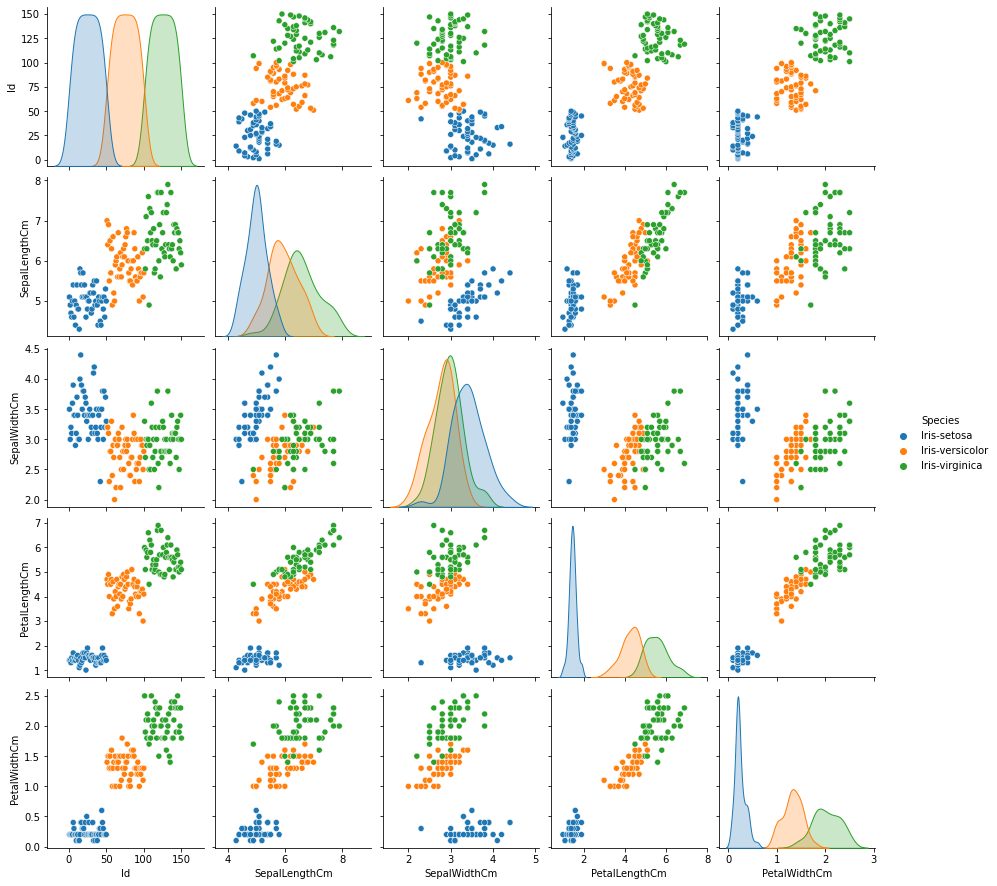

In [5]:
sns.pairplot(iris, hue = 'Species')

In [6]:
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [7]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

### Test Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Data Preprocessing on Training Data

In [9]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61        0.015440     -0.119255       0.225127      0.356382
92       -0.099845     -1.040395       0.113560     -0.028648
112       1.053005     -0.119255       0.950314      1.126441
2        -1.367980      0.341315      -1.392599     -1.312081
141       1.168290      0.111030       0.727180      1.383128

In [13]:
scaler.var_, scaler.scale_

(array([0.75240992, 0.18856824, 3.21355867, 0.60709104]),
 array([0.86741565, 0.43424445, 1.79264014, 0.77916047]))

### Preparing Test Data

In [14]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114      -0.099845     -0.579825       0.727180      1.511471
62        0.130725     -1.961535       0.113560     -0.285335
33       -0.445700      2.644166      -1.336815     -1.312081
107       1.629430     -0.349540       1.396583      0.741412
7        -1.022125      0.801885      -1.281032     -1.312081

### Training KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_rescaled, y_train)

KNeighborsClassifier()

In [16]:
y_test_pred = knn_classifier.predict(X_test_rescaled)

In [17]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

### Training Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_rescaled, y_train)

LogisticRegression()

In [19]:
y_test_pred = lr_classifier.predict(X_test_rescaled)

In [20]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

### Training Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_rescaled, y_train)

GaussianNB()

In [22]:
y_test_pred = nb_classifier.predict(X_test_rescaled)

In [23]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

1.0

### Training Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train_rescaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
y_test_pred = dt_classifier.predict(X_test_rescaled)

In [26]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

### Training Support Vector Classifier

In [27]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train_rescaled, y_train)

SVC()

In [28]:
y_test_pred = sv_classifier.predict(X_test_rescaled)

In [29]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

## Saving the Model (Serialization)

In [30]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(knn_classifier, open('models/knn_model.pkl', 'wb'))
dump(lr_classifier, open('models/lr_model.pkl', 'wb'))
dump(nb_classifier, open('models/nb_model.pkl', 'wb'))
dump(dt_classifier, open('models/dt_model.pkl', 'wb'))
dump(sv_classifier, open('models/sv_model.pkl', 'wb'))